# 오늘의 코딩

# 오늘의 수업

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import pydotplus
from IPython.core.display import Image


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import train_test_split

#classification(분류)
from sklearn.tree import DecisionTreeClassifier, export_graphviz    #의사결정트리
from sklearn.ensemble import RandomForestClassifier  #랜덤포레스트
from sklearn.neighbors import KNeighborsClassifier   #KNN(K_Nearst_Neighbor)K-최근접이웃
from sklearn.linear_model import LogisticRegression  #로지스틱회귀
from sklearn.svm import SVC                          #SVM(Support_Vector_Machine)서포트벡터머신


from sklearn.metrics import confusion_matrix      #혼동행렬
from sklearn.metrics import accuracy_score        #정확도
from sklearn.metrics import precision_score     #정밀도
from sklearn.metrics import recall_score        #재현율
from sklearn.metrics import f1_score            #f1
from sklearn.metrics import roc_auc_score       #roc_auc
from sklearn.metrics import classification_report #종합


#교차검증
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('playtennis.csv')
df

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [3]:
def format_features(df):

    # 문자형 변수들 변환 작업
    features = ['Outlook', 'Temperature', 'Humidity','Wind']
    for feature in features:
        # LabelEncoder는 문자를 정수로 바꿔줌
        le = LabelEncoder()
        # features 항목을 피팅(.inverse_transform은 기존값으로 되돌리기)
        le = le.fit(df[feature])
        # features 항목을 라벨숫자로 변환하기
        df[feature] = le.transform(df[feature])
        
    return df

def transform_features(df):
    df = format_features(df)
    return df


# y값 변환하기
df['PlayTennis'].replace({'No':1,'Yes':2}, inplace=True )


# 종속 변수를 담는 듯
y = df['PlayTennis']

# 종속 변수를 뺀 나머지를 데이터 셋으로 만듬(비교하기 위해)
df_features = df.drop('PlayTennis', axis=1)

# 필요없는 변수들을 제거하고 x축 독립변수들로 만듬
x = transform_features(df_features)

In [4]:
x

,Outlook,Temperature,Humidity,Wind
0,2,1,0,1
1,2,1,0,0
2,0,1,0,1
3,1,2,0,1
4,1,0,1,1
5,1,0,1,0
6,0,0,1,0
7,2,2,0,1
8,2,0,1,1
9,1,2,1,1


In [5]:
y

0     1
1     1
2     2
3     2
4     2
5     1
6     2
7     1
8     2
9     2
10    2
11    2
12    2
13    1
Name: PlayTennis, dtype: int64

In [6]:
# 데이터 나눠서 각 변수에 저장
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.3,
                                                    random_state=101)
# DecisionTree분류 사용하기
dt_clf = DecisionTreeClassifier(random_state=0)

# 데이터 fit 시키기
dt_clf.fit(x_train, y_train)

# 예상결과
dt_prediction = dt_clf.predict(x_test)

In [7]:
print('dt_prediction:', dt_prediction)
print('accuracy:', accuracy_score(y_test, dt_prediction).round(4))

dt_prediction: [2 2 2 2 2]
accuracy: 0.8


In [8]:
from sklearn import tree

dt_dot_data = tree.export_graphviz(
    dt_clf,
    feature_names = ['Outlook','Temperature','Humidity','Wind'],
    class_names = ['No','Yes']
)

dt_dot_data

'digraph Tree {\nnode [shape=box] ;\n0 [label="Outlook <= 1.5\\ngini = 0.494\\nsamples = 9\\nvalue = [4, 5]\\nclass = Yes"] ;\n1 [label="Temperature <= 1.0\\ngini = 0.32\\nsamples = 5\\nvalue = [1, 4]\\nclass = Yes"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Outlook <= 0.5\\ngini = 0.444\\nsamples = 3\\nvalue = [1, 2]\\nclass = Yes"] ;\n1 -> 2 ;\n3 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 1]\\nclass = Yes"] ;\n2 -> 3 ;\n4 [label="Wind <= 0.5\\ngini = 0.5\\nsamples = 2\\nvalue = [1, 1]\\nclass = No"] ;\n2 -> 4 ;\n5 [label="gini = 0.0\\nsamples = 1\\nvalue = [1, 0]\\nclass = No"] ;\n4 -> 5 ;\n6 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 1]\\nclass = Yes"] ;\n4 -> 6 ;\n7 [label="gini = 0.0\\nsamples = 2\\nvalue = [0, 2]\\nclass = Yes"] ;\n1 -> 7 ;\n8 [label="Humidity <= 0.5\\ngini = 0.375\\nsamples = 4\\nvalue = [3, 1]\\nclass = No"] ;\n0 -> 8 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n9 [label="gini = 0.0\\nsamples = 3\\nvalue = 

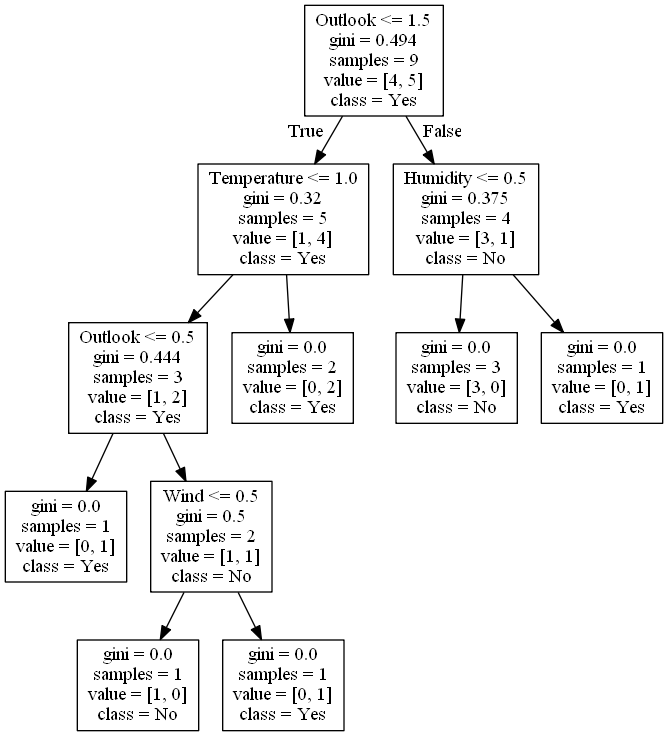

In [21]:
from io import BytesIO
from PIL import Image
from IPython.display import Image
import os

# tree 내용을 그림으로 바꾸기
#data = pydotplus.graph_from_dot_data(dt_dot_data).create_png()
#Image.open(BytesIO(data))
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)
Image(dt_graph.create_png())

In [29]:
import numpy as np
import time

sc = SparkContext.getOrCreate()

NameError: name 'SparkContext' is not defined

In [26]:
MAX = 100000

rdd = sc.parallelize([i for i in range(3, MAX+1)], 10)

def get_prime(num):
    
    isPrime = True
    
    for index in range(2,num):
        
        if num % index == 0:
            
            isPrime = False
            
            break
            
    if isPrime == True:
        
        return num

NameError: name 'sc' is not defined

In [27]:
start = time.time()

prime_list = rdd.map(get_prime).collect()

end = time.time()

print('소요시간 = ', end-start)

NameError: name 'rdd' is not defined